#### 矢量数据属性特征可视化分析

In [2]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt


,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,110000,北京市,100000,中华人民共和国,"POLYGON ((116.89226 39.69491, 116.89227 39.694..."
1,120000,天津市,100000,中华人民共和国,"MULTIPOLYGON (((113.77712 36.63947, 113.78080 ..."
2,130000,河北省,100000,中华人民共和国,"MULTIPOLYGON (((113.56331 36.58910, 113.55295 ..."
3,140000,山西省,100000,中华人民共和国,"POLYGON ((114.04201 40.60888, 114.04441 40.611..."
4,150000,内蒙古自治区,100000,中华人民共和国,"POLYGON ((119.25798 42.22412, 119.25568 42.220..."


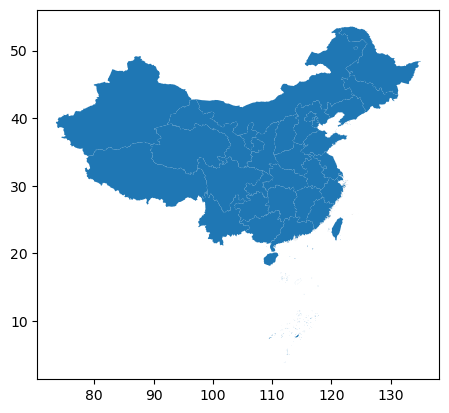

In [22]:
path_vec = 'data/data-base/vector/China-Province/province.shp'
province_gpd = gpd.read_file(path_vec)
province_gpd.plot()
province_gpd.head()


In [45]:
province_gpd_utm48 = province_gpd.to_crs(32648)
province_area = province_gpd_utm48.area/(1000*1000)   ### 可通过遍历每个几何对象进行求取。
province_gpd['area(km2)'] = province_area.values
province_gpd.head()


,pr_adcode,pr_name,cn_adcode,cn_name,geometry,area(km2)
0,110000,北京市,100000,中华人民共和国,"POLYGON ((116.89226 39.69491, 116.89227 39.694...",1.678447e+04
1,120000,天津市,100000,中华人民共和国,"MULTIPOLYGON (((113.77712 36.63947, 113.78080 ...",1.244577e+04
2,130000,河北省,100000,中华人民共和国,"MULTIPOLYGON (((113.56331 36.58910, 113.55295 ...",1.927568e+05
3,140000,山西省,100000,中华人民共和国,"POLYGON ((114.04201 40.60888, 114.04441 40.611...",1.583965e+05
4,150000,内蒙古自治区,100000,中华人民共和国,"POLYGON ((119.25798 42.22412, 119.25568 42.220...",1.165334e+06


根据属性值赋色

<Axes: >

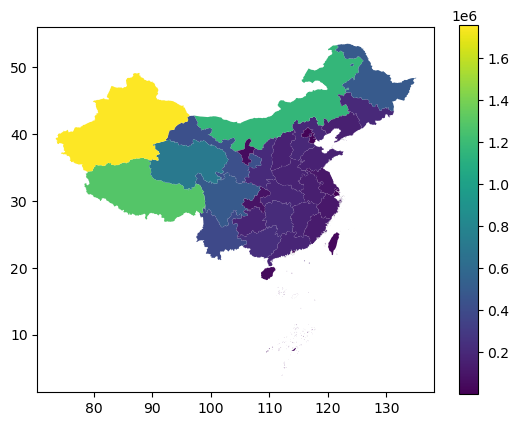

In [28]:
# province_gpd.plot(column='area(km2)')
province_gpd.plot(column='area(km2)', legend=True)


选课同学人数可视化

<Axes: >

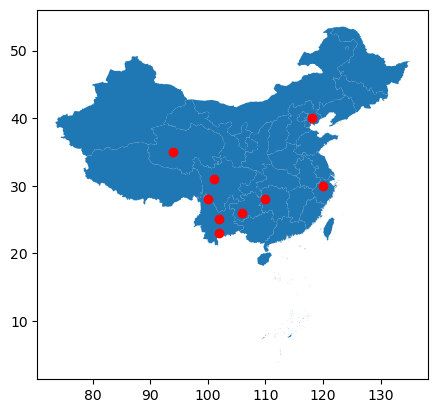

In [33]:
from shapely import Point
dict = {'student': ['zhang1',       'zhang2',       'zhang3',       'zhang4',       'zhang5',       'zhang6',       'zhang7',       'zhang8',       'zhang9'], 
        'geometry': [Point(94, 35), Point(101, 31), Point(102, 25), Point(106, 26), Point(102, 23), Point(120, 30), Point(118, 40), Point(110, 28), Point(100, 28)]}
student_gdf = gpd.GeoDataFrame(dict, crs="EPSG:4326")
ax = province_gpd.plot()
student_gdf.plot(ax=ax, color='red')


In [52]:
student_counts = []

for i, geo in enumerate(province_gpd['geometry']):
  result = geo.contains(student_gdf['geometry'])
  count = sum(result)
  student_counts.append(count)
print(student_counts)


[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0]


<Axes: >

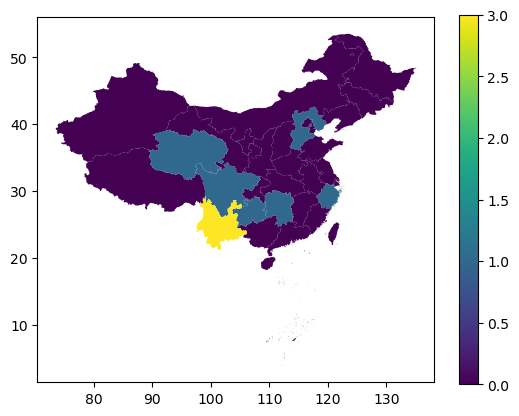

In [55]:
province_gpd['student_count'] = student_counts
province_gpd.head(5)
province_gpd.plot(column='student_count', legend=True)


距离昆明500km内同学人数

In [66]:
point_kunming = Point(102.712251, 25.040609)
transformer = pyproj.Transformer.from_crs(4326, 32648, always_xy=True).transform
point_kunming_utm = transform(transformer, point_kunming)
print(point_kunming_utm)


POINT (269180.21439779236 2771395.4873461174)


In [75]:
poly=point_kunming_utm.buffer(500*1000)
# poly
result = poly.contains(student_gdf['geometry'].to_crs(32648))
print(result)
count = sum(result)
print(count)


0    False
1    False
2     True
3     True
4     True
5    False
6    False
7    False
8     True
Name: geometry, dtype: bool
4
